In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction import text
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from nltk.tokenize import RegexpTokenizer
from nltk.stem.snowball import SnowballStemmer

## About the dataset


This news dataset is a persistent historical archive of noteable events in the Indian subcontinent from start-2001 to q1-2022, recorded in real-time by the journalists of India. It contains approximately 3.6 million events published by Times of India.

A majority of the data is focusing on Indian local news including national, city level and entertainment.

Dataset url: https://www.kaggle.com/datasets/therohk/india-headlines-news-dataset?resource=download

In [2]:
df=pd.read_csv('../input/india-headlines-news-dataset/india-news-headlines.csv')
df.head()

,publish_date,headline_category,headline_text
0,20010102,unknown,Status quo will not be disturbed at Ayodhya; s...
1,20010102,unknown,Fissures in Hurriyat over Pak visit
2,20010102,unknown,America's unwanted heading for India?
3,20010102,unknown,For bigwigs; it is destination Goa
4,20010102,unknown,Extra buses to clear tourist traffic


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3650970 entries, 0 to 3650969
Data columns (total 3 columns):
 #   Column             Dtype 
---  ------             ----- 
 0   publish_date       int64 
 1   headline_category  object
 2   headline_text      object
dtypes: int64(1), object(2)
memory usage: 83.6+ MB


## Counting and dropping duplicates

In [4]:
df[df['headline_text'].duplicated(keep=False)].sort_values('headline_text').count()

publish_date         432989
headline_category    432989
headline_text        432989
dtype: int64

In [5]:
df=df.drop_duplicates('headline_text')

In [6]:
df[df['headline_text'].duplicated(keep=False)].sort_values('headline_text').count()

publish_date         0
headline_category    0
headline_text        0
dtype: int64

Above data indicates that now there are no duplicates present in the dataset.

In [7]:
punc = ['.', ',', '"', "'", '?', '!', ':', ';', '(', ')', '[', ']', '{', '}',"%"]

stop_words = text.ENGLISH_STOP_WORDS.union(punc)

## Vectorization of data
When doing natural language processing, words must be converted into vectors that machine learning algorithms can make use of. If your goal is to do machine learning on text data, like movie reviews or tweets or anything else, you need to convert the text data into numbers. This process is sometimes referred to as “embedding” or “vectorization”.

In terms of vectorization, it is important to remember that it isn’t merely turning a single word into a single number. While words can be transformed into numbers, an entire document can be translated into a vector. Not only can a vector have more than one dimension, but with text data, vectors are usually high-dimensional. This is because each dimension of your feature data will correspond to a word, and the language in the documents you are examining will have thousands of words.

## TF-IDF
In information retrieval, tf–idf or TFIDF, short for term frequency–inverse document frequency, is a numerical statistic that is intended to reflect how important a word is to a document in a collection or corpus. It is often used as a weighting factor in searches of information retrieval, text mining, and user modeling. The tf-idf value increases proportionally to the number of times a word appears in the document and is offset by the frequency of the word in the corpus, which helps to adjust for the fact that some words appear more frequently in general. Nowadays, tf-idf is one of the most popular term-weighting schemes; 83% of text-based recommender systems in the domain of digital libraries use tf-idf.

Variations of the tf–idf weighting scheme are often used by search engines as a central tool in scoring and ranking a document's relevance given a user query. tf–idf can be successfully used for stop-words filtering in various subject fields, including text summarization and classification.

One of the simplest ranking functions is computed by summing the tf–idf for each query term; many more sophisticated ranking functions are variants of this simple model.

In [8]:
headline_values = df['headline_text'].values

In [9]:
vectorizer = TfidfVectorizer(stop_words=stop_words)
X = vectorizer.fit_transform(headline_values)

In [10]:
word_features = vectorizer.get_feature_names()

/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [11]:
print(len(word_features))

219230


In [12]:
print(word_features[1000:1100])

['11hrs', '11hunt', '11k', '11kcr', '11kg', '11km', '11kv', '11l', '11lakh', '11lakhs', '11m', '11mm', '11mn', '11mt', '11mukul', '11mw', '11o', '11oz', '11p7', '11pc', '11persons', '11pm', '11s', '11terrorists', '11th', '11thadmission', '11x6mm', '11years', '11yrs', '12', '120', '1200', '12000', '120000', '12000cr', '12000km', '1200cr', '1200g', '1200gm', '1200kms', '1200mw', '1200s', '1201', '1205', '1206', '1207', '1208', '1209cr', '120b', '120bn', '120cr', '120crore', '120db', '120ft', '120g', '120ha', '120hz', '120k', '120kg', '120km', '120kmph', '120kph', '120kt', '120l', '120m', '120mld', '120mm', '120mt', '120nm', '120th', '120yrs', '121', '1210', '1211', '12135', '1214', '1215t', '1217', '1219', '121cr', '121crore', '121kg', '121m', '121st', '122', '1222', '122666', '1227', '1228', '122cr', '122crore', '122k', '122kg', '122km', '122mm', '122nd', '123', '1233', '1234', '123456']


## Stemming
Stemming is the process of reducing a word into its stem, i.e. its root form. The root form is not necessarily a word by itself, but it can be used to generate words by concatenating the right suffix. For example, the words fish, fishes and fishing all stem into fish, which is a correct word. On the other side, the words study, studies and studying stems into studi, which is not an English word.

## Tokenizing
Tokenization is breaking the sentence into words and punctuation.

In [13]:
stemmer = SnowballStemmer('english')

In [14]:
tokenizer = RegexpTokenizer(r'[a-zA-Z\']+')

In [15]:
def tokenize(text):
    return[stemmer.stem(word) for word in tokenizer.tokenize(text.lower())]

## Vectorization with stop words(words irrelevant to the model), stemming and tokenizing

In [16]:
vectorizer2 = TfidfVectorizer(stop_words=stop_words, tokenizer=tokenize)

In [17]:
X2 = vectorizer2.fit_transform(headline_values)

/opt/conda/lib/python3.7/site-packages/sklearn/feature_extraction/text.py:401: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['abov', 'afterward', 'alon', 'alreadi', 'alway', 'ani', 'anoth', 'anyon', 'anyth', 'anywher', 'becam', 'becaus', 'becom', 'befor', 'besid', 'cri', 'describ', 'dure', 'els', 'elsewher', 'empti', 'everi', 'everyon', 'everyth', 'everywher', 'fifti', 'forti', 'henc', 'hereaft', 'herebi', 'howev', 'hundr', 'inde', 'mani', 'meanwhil', 'moreov', 'nobodi', 'noon', 'noth', 'nowher', 'onc', 'onli', 'otherwis', 'ourselv', 'perhap', 'pleas', 'sever', 'sinc', 'sincer', 'sixti', 'someon', 'someth', 'sometim', 'somewher', 'themselv', 'thenc', 'thereaft', 'therebi', 'therefor', 'togeth', 'twelv', 'twenti', 'veri', 'whatev', 'whenc', 'whenev', 'wherea', 'whereaft', 'wherebi', 'wherev', 'whi', 'yourselv'] not in stop_words.
  % sorted(inconsistent)


In [18]:
word_features2 = vectorizer2.get_feature_names()

In [19]:
print(len(word_features2))

172160


In [20]:
print(word_features2[:50]) 

['', "''", "'a", "'addit", "'aftertaste'", "'alien", "'american", "'americanah'", "'amy'", "'ant", "'anxieti", "'aquaman'", "'attack", "'attempt", "'b", "'barbershop", "'battl", "'beauti", "'befikre'", "'bellari", "'beyond", "'bharat", "'big", "'bill", "'biz", "'boy", "'boyfriend", "'bravetown'", "'broken", "'c", "'call", "'captain", "'cidco", "'closer", "'collater", "'comrade'", "'core", "'cougar'", "'courage'", "'d", "'danc", "'deep", "'depressing'", "'doesn't", "'dragon", "'e", "'excalibur'", "'f", "'fake'", "'fast"]


In [21]:
vectorizer3 = TfidfVectorizer(stop_words = stop_words, tokenizer = tokenize, max_features = 1000)

In [22]:
X3 = vectorizer3.fit_transform(headline_values)

In [23]:
words = vectorizer3.get_feature_names()

## k-means clustering algorithm
k-means clustering is a method of vector quantization, originally from signal processing, that aims to partition n observations into k clusters in which each observation belongs to the cluster with the nearest mean (cluster centers or cluster centroid), serving as a prototype of the cluster. This results in a partitioning of the data space into Voronoi cells.

We will be using elbow method to determine the optimum number of clusters required. This basically sums upto,

number of clusters = the x-axis value of the point that is the corner of the "elbow"(the plot looks often looks like an elbow).

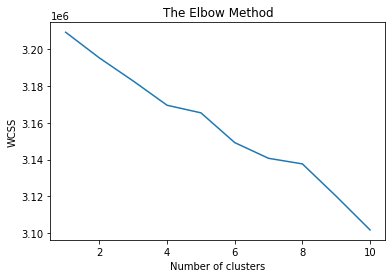

In [24]:
from sklearn.cluster import KMeans

wcss=[]
for i in range (1,11):
    kmeans=KMeans(n_clusters=i,init='k-means++',max_iter=300,n_init=10,random_state=0)
    kmeans.fit(X3)
    wcss.append(kmeans.inertia_)

plt.plot(range(1,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.savefig('elbow.png')
plt.show()

As more than one elbows have been generated, I will have to select right amount of clusters by trial and error. 
So here we see that elbows are generates at 4 clusters, 6 clusters and 8 clusters.

In [25]:
print(words[250:300])

['depart', 'dept', 'design', 'despit', 'detain', 'develop', 'did', 'die', 'differ', 'dip', 'direct', 'director', 'discuss', 'dismiss', 'disput', 'dist', 'district', 'diwali', 'doc', 'doctor', 'doe', 'dog', 'dollar', "don't", 'donat', 'doubl', 'draw', 'dream', 'dri', 'drive', 'driver', 'drop', 'drown', 'drug', 'dump', 'dupe', 'dure', 'duti', 'e', 'earli', 'eas', 'east', 'ec', 'educ', 'elect', 'emerg', 'employe', 'encroach', 'end', 'engin']


## Generating 4 clusters

In [26]:
kmeans = KMeans(n_clusters = 4, n_init = 20) # n_init(number of iterations for clsutering) 
kmeans.fit(X3)
# We look at 4 the clusters generated by k-means.
common_words = kmeans.cluster_centers_.argsort()[:,-1:-26:-1]
for num, centroid in enumerate(common_words):
    print(str(num) + ' : ' + ', '.join(words[word] for word in centroid))

0 : new, say, govt, case, year, held, day, citi, cop, kill, student, man, bjp, polic, delhi, state, road, hc, plan, school, set, meet, make, death, indian
1 : india, pak, china, pakistan, air, world, test, say, team, cup, new, win, vs, australia, launch, make, talk, seri, tie, set, need, south, visit, pm, global
2 : arrest, court, high, case, suprem, man, murder, cop, order, polic, rape, bail, accus, plea, delhi, cbi, woman, year, old, seek, gang, stay, say, kill, hc
3 : rs, crore, lakh, cr, worth, l, seiz, k, held, pay, dupe, fine, man, bank, gold, stolen, rob, govt, cost, fraud, loot, cash, project, arrest, lose


## Generating 6 clusters

In [27]:
kmeans = KMeans(n_clusters = 6, n_init = 20)
kmeans.fit(X3)
# We look at 6 the clusters generated by k-means.
common_words = kmeans.cluster_centers_.argsort()[:,-1:-26:-1]
for num, centroid in enumerate(common_words):
    print(str(num) + ' : ' + ', '.join(words[word] for word in centroid))

0 : new, case, govt, say, rs, year, held, citi, cop, student, bjp, polic, delhi, state, hc, road, arrest, school, set, court, meet, make, indian, cm, poll
1 : india, pak, china, pakistan, air, world, say, team, test, cup, new, win, vs, launch, australia, make, seri, talk, tie, set, need, south, visit, beat, pm
2 : kill, man, held, wife, old, year, accid, woman, arrest, self, injur, rape, death, murder, cop, rs, road, son, attack, life, girl, mishap, daughter, car, book
3 : plan, govt, new, citi, rs, develop, state, centr, india, action, govern, cr, road, panel, build, corpor, delhi, year, water, hit, crore, bjp, park, make, traffic
4 : die, film, accid, old, man, woman, year, fall, hit, festiv, mishap, road, car, girl, hospit, fest, covid, boy, make, youth, truck, bike, famili, student, shoot
5 : day, celebr, case, covid, world, delhi, citi, rain, custodi, strike, polic, r, mark, th, second, test, rs, death, school, cop, year, everi, today, mumbai, india


## Generating 8 clusters

In [28]:
kmeans = KMeans(n_clusters = 8, n_init = 20)
kmeans.fit(X3)
# Finally, we look at 8 the clusters generated by k-means.
common_words = kmeans.cluster_centers_.argsort()[:,-1:-26:-1]
for num, centroid in enumerate(common_words):
    print(str(num) + ' : ' + ', '.join(words[word] for word in centroid))

0 : india, new, govt, citi, student, cop, school, plan, colleg, state, set, hc, delhi, seek, test, make, help, launch, pak, held, polic, univers, protest, world, china
1 : held, bjp, polic, man, delhi, meet, state, set, make, indian, hc, poll, plan, cm, court, time, school, hit, mumbai, water, death, seek, open, work, woman
2 : road, power, accid, cut, kill, citi, suppli, work, mishap, traffic, plant, project, block, repair, hit, resid, state, new, die, plan, water, safeti, govt, delhi, hike
3 : year, kill, old, man, yr, rape, woman, girl, held, new, accid, self, boy, injur, wife, die, jail, arrest, murder, death, youth, delhi, car, cop, bus
4 : say, bjp, govt, cm, india, expert, minist, need, congress, modi, pm, chief, cop, court, singh, hc, polic, report, state, don't, delhi, govern, won't, new, doctor
5 : case, covid, murder, court, new, cbi, file, hc, cop, death, report, arrest, bail, accus, rape, polic, held, probe, rise, day, hear, dengu, fresh, record, sc
6 : day, arrest, celebr